# PHY480 Final Project


## 2-Body System Solved with Forward Euler and Velocity-Verlet

### BY: Logan Maier




---

<img src="http://wonderopolis.org/wp-content/uploads/2014/11/1356_f.jpg" alt = "Artistic representation of sun-earth relationship" width=600 />




---

### Table of Contents
1. [Background](#Background)
2. [Forward Euler](#ForwardEuler)
3. [Velocity-Verlet](#VelocityVerlet) 
4. [Error Analysis](#ErrorAnalysis)
5. [Findings](#Findings)
6. [Review Findings](#Review)
7. [Fun with Velocity-Verlet](#Fun)

---

<a name=Background></a>
# Solar System Coupled Differential Equations

The foundation behind my 2-Body computation is the following system of coupled differentials that describe the relationship between 2 massive bodies in space. 

<img src="couplediff.png">

---

<a name=ForwardEuler></a>
# Forward Euler

When applying the Forward-Euler the coupled differential equations can be discretized with step sizes as shown below.


<img src="fediff.png">


There is an issue with Forward-Euler and that is the topic of Energy Conservation. Energy is not conserved in the Forward-Euler and it is most prominant in cases with large step sizes. 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os
import time

def ForwardEuler(DT,tf):
    n = ceil(tf/DT)

    t = np.zeros(n)
    v = np.zeros((n,2))
    r = np.zeros((n,2))

    r0 = np.array([1.0,0.0])
    v0 = np.array([0.0,2*pi])
    r[0] = r0
    v[0] = v0
    Fourpi2 = 4*(pi**2)
    # Foward Euler Step Iteration

    for i in range(n-1):
        rabs = sqrt(sum(r[i]*r[i]))
        a =  -Fourpi2*r[i]/(rabs**3)

        v[i+1] = v[i] + DT*a
        r[i+1] = r[i] + DT*v[i]
        t[i+1] = t[i] + DT
    return r

### This example displays how a relatively large step size displays a large error in the energy conservation

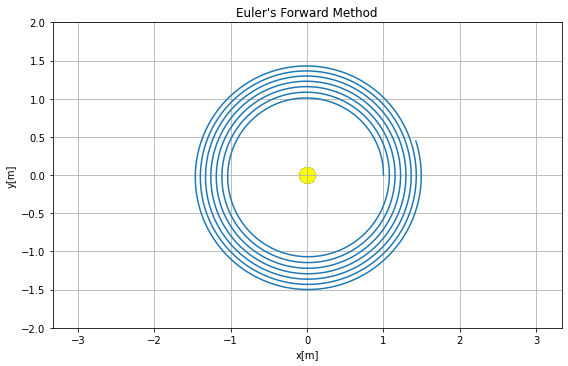

In [2]:
tf = 10
r = ForwardEuler(0.001,tf)


# Plot position as function of time    
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1*tf/3, tf/3)
ax.set_ylim(-1*tf/5, tf/5)
ax.set_ylabel('y[m]')
ax.set_xlabel('x[m]')
ax.plot(r[:,0], r[:,1])
plt.grid()
plt.scatter(0,0, s = 251, color = 'black')
plt.scatter(0,0, s = 250, color = 'yellow')
plt.title("Euler's Forward Method")
fig.tight_layout()
plt.gca().set_aspect('equal')
plt.show()

### The following example shows how a small step size makes the energy conservation more accurate in the Forward Euler

86.4771095000001


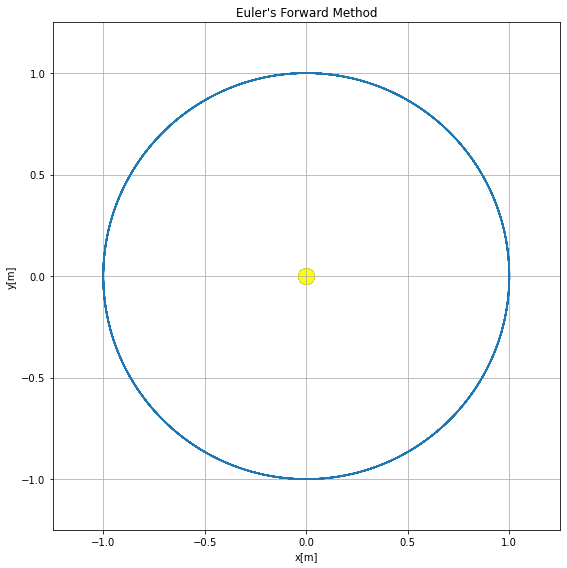

In [45]:
tf = 10
r = ForwardEuler(0.00001,tf)

# Plot position as function of time    
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_ylabel('y[m]')
ax.set_xlabel('x[m]')
ax.plot(r[:,0], r[:,1])
plt.grid()
plt.scatter(0,0, s = 251, color = 'black')
plt.scatter(0,0, s = 250, color = 'yellow')
plt.title("Euler's Forward Method")
fig.tight_layout()
plt.gca().set_aspect('equal')
plt.show()

---

<a name=VelocityVerlet></a>
# Velocity-Verlet
The equations used to derive the Velocity-Verlet method are as follows:

<img src="vv1diff.png">

When applying a Taylor expansion the Velocity-Verlet equations are derived as the following: 


<img src="vvdiff.png">




In [4]:
def VelocityVerlet(DT,tf):
    n = ceil(tf/DT)

    t = np.zeros(n)
    v = np.zeros((n,2))
    r = np.zeros((n,2))

    r0 = np.array([1.0,0.0])
    v0 = np.array([0.0,2*pi])
    r[0] = r0
    v[0] = v0
    Fourpi2 = 4*(pi**2)

    #Velocity-Verlet Step

    for i in range(n-1):
        rabs = sqrt(sum(r[i]*r[i]))
        a =  -Fourpi2*r[i]/(rabs**3)

        r[i+1] = r[i] + DT*v[i]+0.5*(DT**2)*a
        rabs = sqrt(sum(r[i+1]*r[i+1]))
        anew = -4*(pi**2)*r[i+1]/(rabs**3)
        v[i+1] = v[i] + 0.5*DT*(a+anew)
        t[i+1] = t[i] + DT

    
    return r

0.09156520000033197


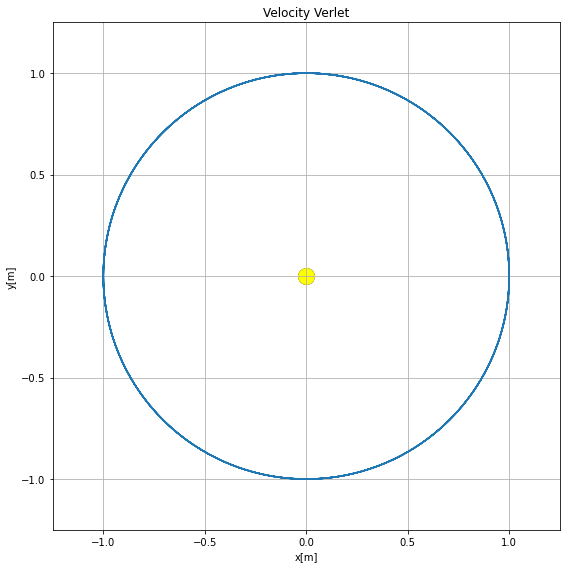

In [76]:
#Computing Velocity-Verlet Simulation
tf = 5.0001
toc = time.perf_counter()
r = VelocityVerlet(0.001,tf)
tic = time.perf_counter()
print(tic - toc)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_ylabel('y[m]')
ax.set_xlabel('x[m]')
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.plot(r[:,0], r[:,1])
plt.grid()
plt.scatter(0,0, s = 251, color = 'black')
plt.scatter(0,0, s = 250, color = 'yellow')
plt.title("Velocity Verlet")
fig.tight_layout()
plt.gca().set_aspect('equal')
plt.show()


---

<a name=ErrorAnalysis></a>
# Error Analysis


First, I am going to start by writing a script that returns the points of a perfect circle that have the same start point and radius as our orbits above. I am going to use these values returned as a baseline for the "actual" solution. Note that this is not going to be at all comparable to real world scenarios since the ODE solvers do not take into account wobble in the larger mass, other celestial forces, etc. 

In [6]:
def Solution(DT,tf):
    radius = 1
    n = int(ceil(tf/DT))
    s = (2,n)
    r = np.zeros(s)
    r[0,0] = 1
    r[0,1] = 0
    theta = np.linspace(0, 2*np.pi, n)
    for i in range(n):
        r[0,i] = radius*np.cos(theta[i])
        r[1,i] = radius*np.sin(theta[i])
    return r

The following code is ment to take in the necassary information to determine the number of points for each array and return the arrays for each type of solver.

In [7]:
def Array_Prep(DT,tf):
    fe = ForwardEuler(DT,tf)
    vv = VelocityVerlet(DT,tf)
    sol = Solution(DT,tf)
    
    return fe, vv, sol

The following bits of code were delevoped with the intent of calculating the overall average percent error of the points computed over the time simulated. 

In [9]:
def percentDiff(a,b):
    pDiff = (b - a)/b
    pDiff[0] = 0
    pDiff = pDiff[:-1] 
    return pDiff
def avg_error_array(a,b):
    error_array = (a + b)/2
    return error_array

In [22]:
def error_comparison(dt,tf):
    fe, vv, sol = Array_Prep(dt,tf)
    fe_x = fe[:,0]
    fe_y = fe[:,1]
    vv_x = vv[:,0]
    vv_y = vv[:,1]
    sol_x = sol[0,:]
    sol_y = sol[1,:]
    
    percent_diff_fe_x = percentDiff(fe_x, sol_x)
    percent_diff_fe_y = percentDiff(fe_y, sol_y)
    avg_error_fe = avg_error_array(percent_diff_fe_x,percent_diff_fe_y)
    
    percent_diff_vv_x = percentDiff(vv_x, sol_x)
    percent_diff_vv_y = percentDiff(vv_y, sol_y)
    avg_error_vv = avg_error_array(percent_diff_vv_x,percent_diff_vv_y)
    
    return abs(np.mean(avg_error_fe))*100, abs(np.mean(avg_error_vv))*100

In [64]:
steps = ([0.01,0.001,0.0001,0.00001,0.000001])
for i in steps:
    fe,vv = error_comparison(i,5)
    print(f"""Percent Error with Step Size:{i} for Forward Euler:{np.round(fe,4)}% and Velocity-Verlet {np.round(vv,4)}%""")

<ipython-input-9-1a7dc121952b>:2: RuntimeWarning: invalid value encountered in true_divide
  pDiff = (b - a)/b


Percent Error with Step Size:0.01 for Forward Euler:53.2659% and Velocity-Verlet 3.0344%
Percent Error with Step Size:0.001 for Forward Euler:121.0451% and Velocity-Verlet 0.3044%
Percent Error with Step Size:0.0001 for Forward Euler:50.2876% and Velocity-Verlet 0.04%
Percent Error with Step Size:1e-05 for Forward Euler:8.2617% and Velocity-Verlet 0.0051%
Percent Error with Step Size:1e-06 for Forward Euler:1.0073% and Velocity-Verlet 0.0006%


---

<a name=Findings></a>
# Findings

|| Step Size | Percent Error | | Step Size | Percent Error |
| --- | --- | --- | --- | --- | --- |
| Forward Euler | 0.01 | 53.27% | Velocity-Verlet | 0.01 | 3.03% |
| Forward Euler | 0.001 | 121.05% | Velocity-Verlet | 0.001 | 0.30% |
| Forward Euler | 0.0001 | 50.29% | Velocity-Verlet | 0.0001 | 0.04% |
| Forward Euler | 0.00001 | 8.26% | Velocity-Verlet | 0.00001 | .005% |
| Forward Euler | 0.000001 | 1.01% | Velocity-Verlet | 0.000001 | 0.0006% |


The evidence shows that the Forward Euler doesn't give results within 1% error until the step size is 0.000001, which takes my serial code 86.48 seconds to perform. On the other hand, the Velocity-Verlet Method can achieve 0.3% error in 0.9 Sec.

Text(0.5, 0, 'Step Size')

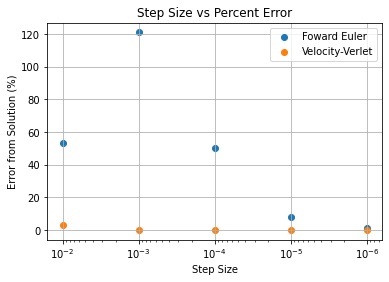

In [77]:
fEuler = ([53.27,121.05,50.29,8.26,1.01])
vVerlet = ([3.03,.3,.04,.005,.0006])
stepSize = ([.01,.001,.0001,.00001,.000001])
fig, ax = plt.subplots(1, 1)
plt.scatter(stepSize,fEuler, label = "Foward Euler")
plt.scatter(stepSize,vVerlet, label = "Velocity-Verlet")
plt.xscale("log")
plt.title("Step Size vs Percent Error")
plt.legend()
plt.grid()
ax.invert_xaxis()
ax.set_ylabel('Error from Solution (%)')
ax.set_xlabel('Step Size')

<a name=Review></a>
# Reviewing the outcome

Upon review of the two ODE solvers, we see that the Velocity-Verlet method is the all around better choice when computing complex differential systems. The figures regarding the Forward Euler show many faults when used to simulate an orbitting mass. The largest issue is that the Forward Euler does not follow the convservation of energy, and can only give us relatively correct approximations when we sacrifice computational efficiency. I can prove this by comparing the results of the Forward Euler to a hypothetical orbit that is a perfect circle, which is the hypothesized outcome of our algorithms given that there are no other forces acting on the system and the central mass is not wobbling. When calculating error I took a percent difference for each position, both x and y, of the ODE computed arrays and the solution array and created an array of errors for each point. I then averaged both error arrays to simplify down to a single percent error value to compare the Forward Euler and Velocity Verlet.  
    
I mentioned that the Forward Euler would need to sacrifice computational efficiency to be anywhere near accurate, and that is because during my testing I found that the Forward Euler would need a minimum step size of 0.000001 to get <= ~1 percent error. With this step size, and a 5 year simulated final time, the Forward Euler took ~90 times longer than the Velocity Verlet method did to achieve only a 0.3% error at 0.001 step size. So in the end the Velocity-Verlet method is proven to require far less computational resources, i.e. take less time, for a far more accurate results, i.e. lower % error.

---

<a name=Fun></a>
# Fun with Velocity-Verlet

Below is an example of how we can utilize Velocity-Verlet to simulate an N-Body system. Here I simulate the 2 dimensional orbits of our solar system!

In [65]:
class Planet:
    def __init__(self, x, y, v_x, v_y, mass):
        self.x = x
        self.y = y
        self.v_x = 365*v_x
        self.v_y = 365*v_y
        self.mass = mass
        
    def gf_x(self, planet):
        rsep = ((self.x-planet.x)**2+(self.y-planet.y)**2)**(1/2)
        return -4*np.pi**2*(self.x-planet.x)*planet.mass/(rsep)**3
    
    def gf_y(self, planet):
        rsep = ((self.x-planet.x)**2+(self.y-planet.y)**2)**(1/2)
        return -4*np.pi**2*(self.y-planet.y)*planet.mass/(rsep)**3
    
    def a_x(self, x, y):
        r = ((x)**2+(y)**2)**(1/2)
        a_x = -4*np.pi**2*x/(r**3)
        return a_x
    
    def a_y(self, x, y):
        r = ((x)**2+(y)**2)**(1/2)
        a_y = -4*np.pi**2*y/(r**3)
        return a_y

def new_a_x(main_planet, planets):
    a_x = main_planet.a_x(main_planet.x, main_planet.y)
    for planet in planets:
        if planet != main_planet:
            a_x += main_planet.gf_x(planet)
    return a_x

def new_a_y(main_planet, planets):
    a_y = main_planet.a_y(main_planet.x, main_planet.y)
    for planet in planets:
        if planet != main_planet:
            a_y += main_planet.gf_y(planet)
    return a_y

In [66]:
mercury = Planet(2.80E-01,1.73E-01,-2.01E-02,2.53E-02,1.65E-07)
venus = Planet(-7.02E-01, 1.36E-01,-3.81E-03, -1.99E-02,2.45E-06)
earth = Planet(-9.88E-01, 8.50E-02,-1.68E-03, -1.71E-02,3.0E-06) 
mars = Planet(7.78E-01, 1.28,-1.14E-02, 8.47E-03,3.3E-07)
jupiter = Planet(-5.23, -1.53,2.02E-3, -6.88E-03,0.00095)
saturn = Planet(-1.48,-9.93,5.212E-03, -8.39E-04,0.000275)
uranus = Planet(1.82E01, 8.08,-1.62E-03, 3.41E-03,0.000044)
neptune = Planet(2.84E01, -9.47,9.711E-04, 2.997E-03,0.0000515)
pluto = Planet(9.89, -3.18E01,3.06E-03, 2.906E-04,6.55E-09)
planets = [mercury, venus, earth, mars, jupiter, saturn, uranus, neptune, pluto]

In [67]:
h = 1/365
n = int(250/h)

x_list =[]
y_list = []

for planet in planets:
    #setting up our initial conditions and arrays
    x = np.zeros(n+1) 
    y = np.zeros(n+1) 
    v_x = np.zeros(n+1) 
    v_y = np.zeros(n+1) 
    x[0] = planet.x
    y[0] = planet.y
    v_x[0] = planet.v_x
    v_y[0] = planet.v_y

    for i in range(n):
        a_x = new_a_x(planet, planets)
        a_y = new_a_y(planet, planets)

        x[i+1] = x[i] + h*v_x[i]+h**2*a_x/2
        y[i+1] = y[i] + h*v_y[i]+h**2*a_y/2

        planet.x = x[i] + h*v_x[i]+h**2*a_x/2
        planet.y = y[i] + h*v_y[i]+h**2*a_y/2

        a_x_new = new_a_x(planet, planets)
        a_y_new = new_a_y(planet, planets)

        v_x[i+1] = v_x[i]+(h/2)*(a_x_new+a_x)
        v_y[i+1] = v_y[i]+(h/2)*(a_y_new+a_y)

        planet.v_x = v_x[i]+(h/2)*(a_x_new+a_x)
        planet.v_y = v_y[i]+(h/2)*(a_y_new+a_y)
    x_list.append(x)
    y_list.append(y)
print("Planets are done")

Planets are done


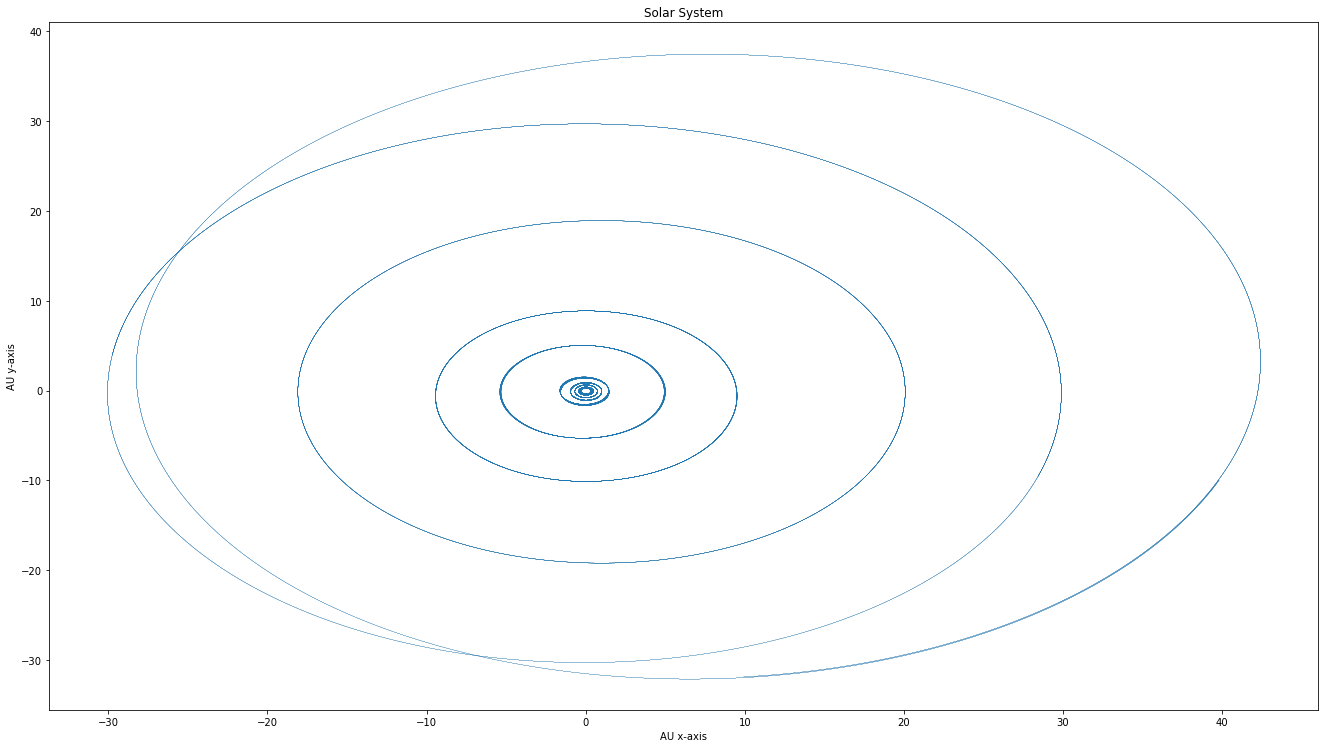

In [75]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(x_list,y_list,s=.0001)

ax.set_xlabel('AU x-axis')
ax.set_ylabel('AU y-axis')

plt.title('Solar System')
plt.tight_layout()